In [1]:
# make an image of the detector with the hits

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import numpy as np
    
%matplotlib widget


In [2]:
import pandas as pd

# Read the data from the file
df = pd.read_csv('LocID=2_runs=1_NMin=20_RCan=1000FHS =0.1_plot.txt', sep="\t")

# Initialize lists
X, Y, Z, Time, Type, ID = [], [], [], [], [], []
XHyd, YHyd, ZHyd, IDHyd = [], [], [], []
Azimuth, Zenith, XSource, YSource, ZSource = [], [], [], [], []

# Open and read the file
with open('LocID=2_runs=1_NMin=20_RCan=1000FHS =0.1_plot.txt', 'r') as file:
    for line in file:
        # Split the line into values
        values = line.split()
                       
        if len(values) == 6:
            X.append(float(values[0]))
            Y.append(float(values[1]))
            Z.append(float(values[2]))
            Time.append(float(values[3]))
            Type.append(float(values[4]))
            ID.append(float(values[5]))
            
        if len(values) == 5:
            Azimuth.append(float(values[0]))
            Zenith.append(float(values[1]))
            XSource.append(float(values[2]))
            YSource.append(float(values[3]))
            ZSource.append(float(values[4]))
        
        if len(values) == 4:
            XHyd.append(float(values[0]))
            YHyd.append(float(values[1]))
            ZHyd.append(float(values[2]))
            IDHyd.append(float(values[3]))
            
            
print(Azimuth)
print(Zenith)

print(len(XHyd))
print(len(YHyd))
print(len(ZHyd))

[40.0]
[20.0]
1690
1690
1690


In [3]:
index = []
noise = []

# find the hits that represent a hit from the nu_pulse (Type == 14.0)
for i in range(0, len(Type)):
    if Type[i] == 14.0:
        index.append(i)
        
# find the hits that represent a hit from the noise (Type == -1.0)
for i in range(0, len(Type)):
    if Type[i] == -1.0:
        noise.append(i)

In [4]:
Nu_X = []
Nu_Y = []
Nu_Z = []
Nu_Time = []
Nu_ID = []

Noise_X = []
Noise_Y = []
Noise_Z = []
Noise_Time = []
Noise_ID = []

# fill the lists with values for all the neutrino hits
for j in range(0, len(index)):
    Nu_X.append(X[index[j]])
    Nu_Y.append(Y[index[j]])
    Nu_Z.append(Z[index[j]])
    Nu_Time.append(Time[index[j]])
    Nu_ID.append(ID[index[j]])
    
# fill the lists with values for all the noise hits
for k in range(0, len(noise)):
    Noise_X.append(X[noise[k]])
    Noise_Y.append(Y[noise[k]])
    Noise_Z.append(Z[noise[k]])
    Noise_Time.append(Time[noise[k]])
    Noise_ID.append(ID[noise[k]])

In [5]:
def calculate_coordinates(point, azimuth_degrees, zenith_degrees, length):
    azimuth = np.radians(azimuth_degrees)
    zenith = np.radians(zenith_degrees)
    
    dx = length * np.sin(zenith) * np.cos(azimuth)
    dy = length * np.sin(zenith) * np.sin(azimuth)
    dz = length * np.cos(zenith)
    return point[0] + dx, point[1] + dy, point[2] + dz

In [6]:
point_real = [XSource[0], YSource[0], ZSource[0]]
azimuth_degrees = Azimuth[0]
zenith_degrees = Zenith[0]

# Line length
length = 1000

# Calculate the coordinates of the line's start and end points
start = point_real
end = calculate_coordinates(point_real, azimuth_degrees, zenith_degrees, length)

In [7]:
line_x = [end[0], XSource[0]]
line_y = [end[1], YSource[0]]
line_z = [end[2], ZSource[0]]

In [8]:
xline = np.linspace(start[0], end[0], 100)
yline = np.linspace(start[1], end[1], 100)
zline = np.linspace(start[2], end[2], 100)

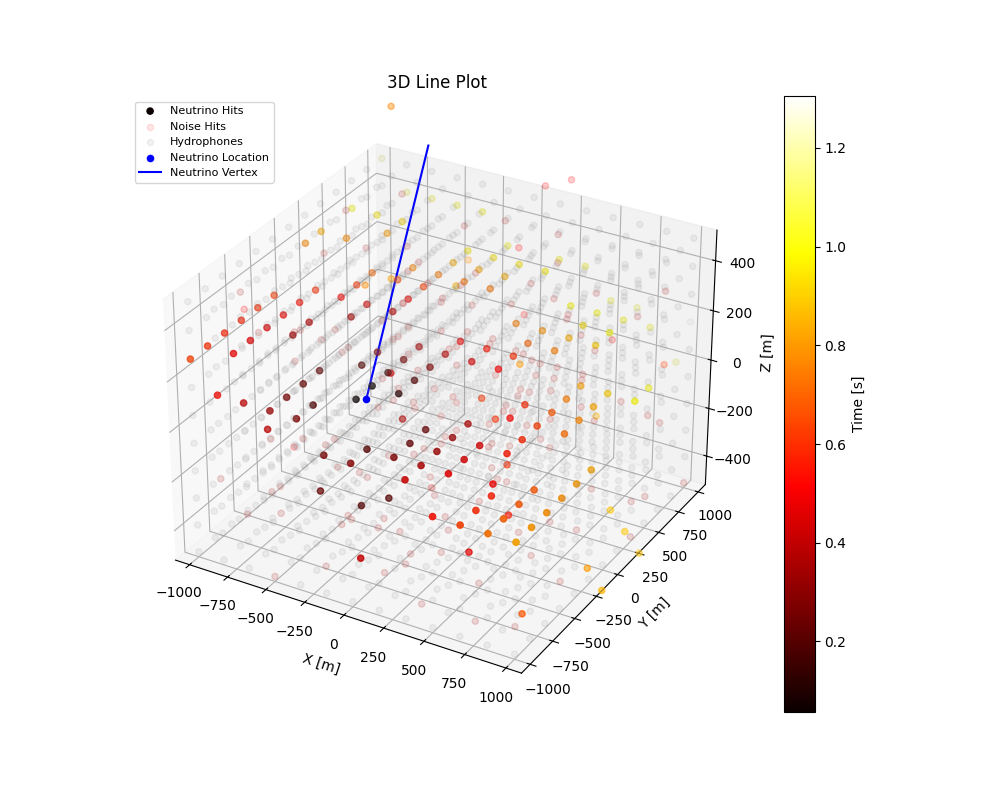

In [13]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

#normalized_time = [(x - min(Nu_Time)) / (max(Nu_Time) - min(Nu_Time)) for x in Nu_Time]

# Plot the hydrophones with the false hits and neutrino hits
scatter_neutrino = ax.scatter(Nu_X, Nu_Y, Nu_Z, c=Nu_Time, cmap='hot', label="Neutrino Hits")
cbar = plt.colorbar(scatter_neutrino)
cbar.set_label('Time [s]')
ax.scatter(Noise_X, Noise_Y, Noise_Z, c='r', label="Noise Hits", alpha=0.1)
ax.scatter(XHyd, YHyd, ZHyd, c='grey', label="Hydrophones", alpha=0.1)

# Plot the neutrino track and location
ax.scatter(XSource, YSource, ZSource, c='b', label="Neutrino Location", alpha=1)
ax.plot(xline, yline, zline, c='b', label="Neutrino Vertex")

ax.set_xlabel('X [m]')
ax.set_xlim(-1050, 1050)
ax.set_ylabel('Y [m]')
ax.set_ylim(-1050, 1050)
ax.set_zlabel('Z [m]')
ax.set_zlim(-500, 500)
ax.set_title('3D Line Plot')


ax = Axes3D(fig)


plt.legend(fontsize = 8, loc='upper left')
plt.savefig("event display.jpg")

### Now do the same showing the hits the clique algorythm detects

### NMin = 10

In [11]:
import pandas as pd

# Read the data from the file
df = pd.read_csv('LocID=2_runs=1_NMin=10_RCan=1000FHS =0.1_plot.txt', sep="\t")

# Initialize lists
X, Y, Z, Time, Type, ID = [], [], [], [], [], []
CX, CY, CZ, CTime, CType, CID, Clique = [], [], [], [], [], [], []
XHyd, YHyd, ZHyd, IDHyd = [], [], [], []
Azimuth, Zenith, XSource, YSource, ZSource = [], [], [], [], []

# Open and read the file
with open('LocID=2_runs=1_NMin=10_RCan=1000FHS =0.1_plot.txt', 'r') as file:
    for line in file:
        # Split the line into values
        values = line.split()
        
        if len(values) == 7:
            CX.append(float(values[0]))
            CY.append(float(values[1]))
            CZ.append(float(values[2]))
            CTime.append(float(values[3]))
            CType.append(float(values[4]))
            CID.append(float(values[5]))
            Clique.append(values[6])
            
        if len(values) == 6:
            X.append(float(values[0]))
            Y.append(float(values[1]))
            Z.append(float(values[2]))
            Time.append(float(values[3]))
            Type.append(float(values[4]))
            ID.append(float(values[5]))
            
        if len(values) == 5:
            Azimuth.append(float(values[0]))
            Zenith.append(float(values[1]))
            XSource.append(float(values[2]))
            YSource.append(float(values[3]))
            ZSource.append(float(values[4]))
        
        if len(values) == 4:
            XHyd.append(float(values[0]))
            YHyd.append(float(values[1]))
            ZHyd.append(float(values[2]))
            IDHyd.append(float(values[3]))
            
            
print(Azimuth)
print(Zenith)
print(len(XHyd))
print(len(YHyd))
print(len(ZHyd))

[40.0]
[20.0]
1690
1690
1690


In [12]:
Cindex = []
Cnoise = []

# find the hits that represent a hit from the nu_pulse (Type == 14.0)
for i in range(0, len(Type)):
    if Type[i] == 14.0:
        Cindex.append(i)
        
# find the hits that represent a hit from the noise (Type == -1.0)
for i in range(0, len(Type)):
    if Type[i] == -1.0:
        Cnoise.append(i)

In [13]:
CNu_X = []
CNu_Y = []
CNu_Z = []
CNu_Time = []
CNu_ID = []

CNoise_X = []
CNoise_Y = []
CNoise_Z = []
CNoise_Time = []
CNoise_ID = []

# fill the lists with values for all the neutrino hits
for j in range(0, len(Cindex)):
    CNu_X.append(X[Cindex[j]])
    CNu_Y.append(Y[Cindex[j]])
    CNu_Z.append(Z[Cindex[j]])
    CNu_Time.append(Time[Cindex[j]])
    CNu_ID.append(ID[Cindex[j]])
    
# fill the lists with values for all the noise hits
for k in range(0, len(Cnoise)):
    CNoise_X.append(X[Cnoise[k]])
    CNoise_Y.append(Y[Cnoise[k]])
    CNoise_Z.append(Z[Cnoise[k]])
    CNoise_Time.append(Time[Cnoise[k]])
    CNoise_ID.append(ID[Cnoise[k]])

In [14]:
Cpoint_real = [XSource[0], YSource[0], ZSource[0]]
Cazimuth_degrees = Azimuth[0]
Czenith_degrees = Zenith[0]

# Line length
Clength = 1000

# Calculate the coordinates of the line's start and end points
Cstart = Cpoint_real
Cend = calculate_coordinates(Cpoint_real, Cazimuth_degrees, Czenith_degrees, Clength)

In [15]:
Cline_x = [Cend[0], XSource[0]]
Cline_y = [Cend[1], YSource[0]]
Cline_z = [Cend[2], ZSource[0]]

In [16]:
Cxline = np.linspace(Cstart[0], Cend[0], 100)
Cyline = np.linspace(Cstart[1], Cend[1], 100)
Czline = np.linspace(Cstart[2], Cend[2], 100)

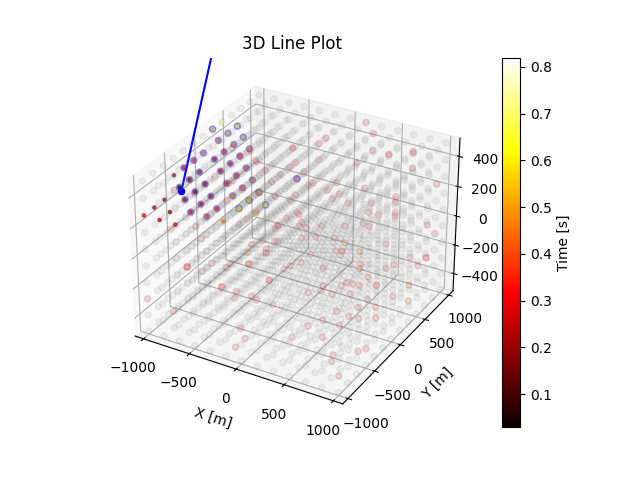

In [17]:
# Create a 3D figure
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#normalized_time = [(x - min(Nu_Time)) / (max(Nu_Time) - min(Nu_Time)) for x in Nu_Time]

# Plot the hydrophones with the false hits and neutrino hits
scatter_neutrino = ax.scatter(CNu_X, CNu_Y, CNu_Z, c=CNu_Time, cmap='hot', label="Neutrino Hits", s=5)
scatter_clique = ax.scatter(CX, CY, CZ, label="Clique Hits", s=20, color='blue', alpha=0.3)

cbar = plt.colorbar(scatter_neutrino)
cbar.set_label('Time [s]')
ax.scatter(CNoise_X, CNoise_Y, CNoise_Z, c='r', label="Noise Hits", alpha=0.1)
ax.scatter(XHyd, YHyd, ZHyd, c='grey', label="Hydrophones", alpha=0.1)

# Plot the neutrino track and location
ax.scatter(XSource, YSource, ZSource, c='b', label="Neutrino Location", alpha=1)
ax.plot(Cxline, Cyline, Czline, c='b', label="Neutrino Vertex")

ax.set_xlabel('X [m]')
ax.set_xlim(-1050, 1050)
ax.set_ylabel('Y [m]')
ax.set_ylim(-1050, 1050)
ax.set_zlabel('Z [m]')
ax.set_zlim(-500, 500)
ax.set_title('3D Line Plot')


ax = Axes3D(fig)


#plt.legend(fontsize = 8, loc='upper left')

### NMin = 5

In [18]:
import pandas as pd

# Read the data from the file
df = pd.read_csv('LocID=2_runs=1_NMin=5_RCan=1000FHS =0.1_plot.txt', sep="\t")

# Initialize lists
X, Y, Z, Time, Type, ID = [], [], [], [], [], []
CX, CY, CZ, CTime, CType, CID, Clique = [], [], [], [], [], [], []
XHyd, YHyd, ZHyd, IDHyd = [], [], [], []
Azimuth, Zenith, XSource, YSource, ZSource = [], [], [], [], []

# Open and read the file
with open('LocID=2_runs=1_NMin=5_RCan=1000FHS =0.1_plot.txt', 'r') as file:
    for line in file:
        # Split the line into values
        values = line.split()
        
        if len(values) == 7:
            CX.append(float(values[0]))
            CY.append(float(values[1]))
            CZ.append(float(values[2]))
            CTime.append(float(values[3]))
            CType.append(float(values[4]))
            CID.append(float(values[5]))
            Clique.append(values[6])
            
        if len(values) == 6:
            X.append(float(values[0]))
            Y.append(float(values[1]))
            Z.append(float(values[2]))
            Time.append(float(values[3]))
            Type.append(float(values[4]))
            ID.append(float(values[5]))
            
        if len(values) == 5:
            Azimuth.append(float(values[0]))
            Zenith.append(float(values[1]))
            XSource.append(float(values[2]))
            YSource.append(float(values[3]))
            ZSource.append(float(values[4]))
        
        if len(values) == 4:
            XHyd.append(float(values[0]))
            YHyd.append(float(values[1]))
            ZHyd.append(float(values[2]))
            IDHyd.append(float(values[3]))
            
                
print(Azimuth)
print(Zenith)
print(len(XHyd))
print(len(YHyd))
print(len(ZHyd))

[40.0]
[20.0]
1690
1690
1690


In [19]:
Cindex = []
Cnoise = []

# find the hits that represent a hit from the nu_pulse (Type == 14.0)
for i in range(0, len(Type)):
    if Type[i] == 14.0:
        Cindex.append(i)
        
# find the hits that represent a hit from the noise (Type == -1.0)
for i in range(0, len(Type)):
    if Type[i] == -1.0:
        Cnoise.append(i)

In [20]:
CNu_X = []
CNu_Y = []
CNu_Z = []
CNu_Time = []
CNu_ID = []

CNoise_X = []
CNoise_Y = []
CNoise_Z = []
CNoise_Time = []
CNoise_ID = []

# fill the lists with values for all the neutrino hits
for j in range(0, len(Cindex)):
    CNu_X.append(X[Cindex[j]])
    CNu_Y.append(Y[Cindex[j]])
    CNu_Z.append(Z[Cindex[j]])
    CNu_Time.append(Time[Cindex[j]])
    CNu_ID.append(ID[Cindex[j]])
    
# fill the lists with values for all the noise hits
for k in range(0, len(Cnoise)):
    CNoise_X.append(X[Cnoise[k]])
    CNoise_Y.append(Y[Cnoise[k]])
    CNoise_Z.append(Z[Cnoise[k]])
    CNoise_Time.append(Time[Cnoise[k]])
    CNoise_ID.append(ID[Cnoise[k]])

In [21]:
Cpoint_real = [XSource[0], YSource[0], ZSource[0]]
Cazimuth_degrees = Azimuth[0]
Czenith_degrees = Zenith[0]

# Line length
Clength = 1000

# Calculate the coordinates of the line's start and end points
Cstart = Cpoint_real
Cend = calculate_coordinates(Cpoint_real, Cazimuth_degrees, Czenith_degrees, Clength)

In [22]:
Cline_x = [Cend[0], XSource[0]]
Cline_y = [Cend[1], YSource[0]]
Cline_z = [Cend[2], ZSource[0]]
Cxline = np.linspace(Cstart[0], Cend[0], 100)
Cyline = np.linspace(Cstart[1], Cend[1], 100)
Czline = np.linspace(Cstart[2], Cend[2], 100)

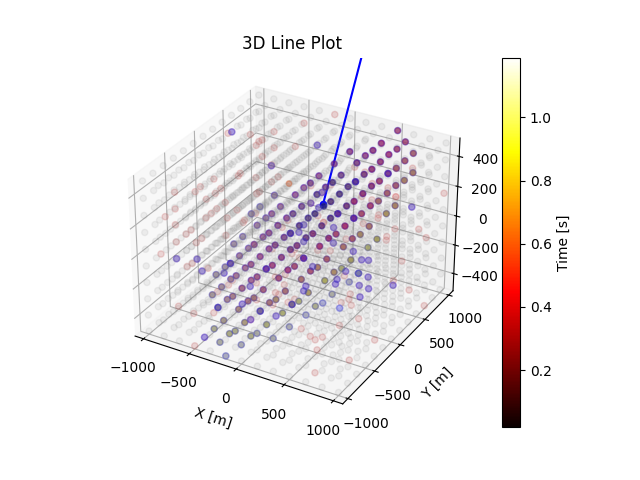

In [23]:
# Create a 3D figure
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#normalized_time = [(x - min(Nu_Time)) / (max(Nu_Time) - min(Nu_Time)) for x in Nu_Time]

# Plot the hydrophones with the false hits and neutrino hits
scatter_neutrino = ax.scatter(CNu_X, CNu_Y, CNu_Z, c=CNu_Time, cmap='hot', label="Neutrino Hits", s=15)
scatter_clique = ax.scatter(CX, CY, CZ, label="Clique Hits", s=20, color='blue', alpha=0.3)

cbar = plt.colorbar(scatter_neutrino)
cbar.set_label('Time [s]')
ax.scatter(CNoise_X, CNoise_Y, CNoise_Z, c='r', label="Noise Hits", alpha=0.1)
ax.scatter(XHyd, YHyd, ZHyd, c='grey', label="Hydrophones", alpha=0.1)

# Plot the neutrino track and location
ax.scatter(XSource, YSource, ZSource, c='b', label="Neutrino Location", alpha=1)
ax.plot(Cxline, Cyline, Czline, c='b', label="Neutrino Vertex")

ax.set_xlabel('X [m]')
ax.set_xlim(-1050, 1050)
ax.set_ylabel('Y [m]')
ax.set_ylim(-1050, 1050)
ax.set_zlabel('Z [m]')
ax.set_zlim(-500, 500)
ax.set_title('3D Line Plot')


ax = Axes3D(fig)


#plt.legend(fontsize = 8, loc='upper left')

### NMin = 10

In [24]:
import pandas as pd

# Read the data from the file
df = pd.read_csv('2LocID=2_runs=1_NMin=10_RCan=1000FHS =0.1_plot.txt', sep="\t")

# Initialize lists
X, Y, Z, Time, Type, ID = [], [], [], [], [], []
CX, CY, CZ, CTime, CType, CID, Clique = [], [], [], [], [], [], []
XHyd, YHyd, ZHyd, IDHyd = [], [], [], []
Azimuth, Zenith, XSource, YSource, ZSource = [], [], [], [], []

# Open and read the file
with open('2LocID=2_runs=1_NMin=10_RCan=1000FHS =0.1_plot.txt', 'r') as file:
    for line in file:
        # Split the line into values
        values = line.split()
        
        if len(values) == 7:
            CX.append(float(values[0]))
            CY.append(float(values[1]))
            CZ.append(float(values[2]))
            CTime.append(float(values[3]))
            CType.append(float(values[4]))
            CID.append(float(values[5]))
            Clique.append(values[6])
            
        if len(values) == 6:
            X.append(float(values[0]))
            Y.append(float(values[1]))
            Z.append(float(values[2]))
            Time.append(float(values[3]))
            Type.append(float(values[4]))
            ID.append(float(values[5]))
            
        if len(values) == 5:
            Azimuth.append(float(values[0]))
            Zenith.append(float(values[1]))
            XSource.append(float(values[2]))
            YSource.append(float(values[3]))
            ZSource.append(float(values[4]))
        
        if len(values) == 4:
            XHyd.append(float(values[0]))
            YHyd.append(float(values[1]))
            ZHyd.append(float(values[2]))
            IDHyd.append(float(values[3]))
            
                
print(Azimuth)
print(Zenith)
print(len(XHyd))
print(len(YHyd))
print(len(ZHyd))

[40.0]
[20.0]
1690
1690
1690


In [25]:
Cindex = []
Cnoise = []

# find the hits that represent a hit from the nu_pulse (Type == 14.0)
for i in range(0, len(Type)):
    if Type[i] == 14.0:
        Cindex.append(i)
        
# find the hits that represent a hit from the noise (Type == -1.0)
for i in range(0, len(Type)):
    if Type[i] == -1.0:
        Cnoise.append(i)

In [26]:
CNu_X = []
CNu_Y = []
CNu_Z = []
CNu_Time = []
CNu_ID = []

CNoise_X = []
CNoise_Y = []
CNoise_Z = []
CNoise_Time = []
CNoise_ID = []

# fill the lists with values for all the neutrino hits
for j in range(0, len(Cindex)):
    CNu_X.append(X[Cindex[j]])
    CNu_Y.append(Y[Cindex[j]])
    CNu_Z.append(Z[Cindex[j]])
    CNu_Time.append(Time[Cindex[j]])
    CNu_ID.append(ID[Cindex[j]])
    
# fill the lists with values for all the noise hits
for k in range(0, len(Cnoise)):
    CNoise_X.append(X[Cnoise[k]])
    CNoise_Y.append(Y[Cnoise[k]])
    CNoise_Z.append(Z[Cnoise[k]])
    CNoise_Time.append(Time[Cnoise[k]])
    CNoise_ID.append(ID[Cnoise[k]])

In [27]:
Cpoint_real = [XSource[0], YSource[0], ZSource[0]]
Cazimuth_degrees = Azimuth[0]
Czenith_degrees = Zenith[0]

# Line length
Clength = 1000

# Calculate the coordinates of the line's start and end points
Cstart = Cpoint_real
Cend = calculate_coordinates(Cpoint_real, Cazimuth_degrees, Czenith_degrees, Clength)

In [28]:
Cline_x = [Cend[0], XSource[0]]
Cline_y = [Cend[1], YSource[0]]
Cline_z = [Cend[2], ZSource[0]]
Cxline = np.linspace(Cstart[0], Cend[0], 100)
Cyline = np.linspace(Cstart[1], Cend[1], 100)
Czline = np.linspace(Cstart[2], Cend[2], 100)

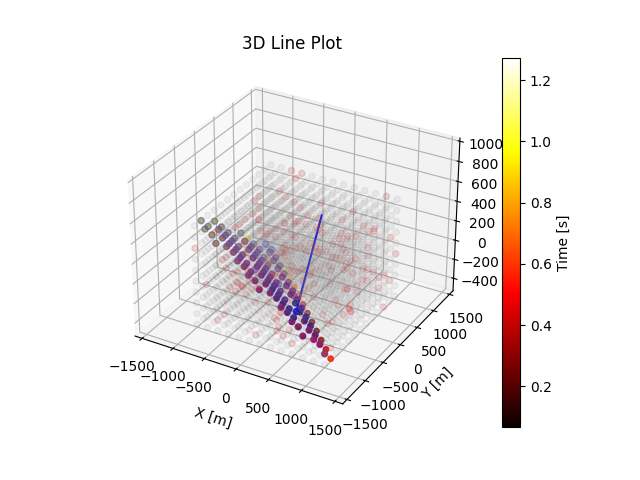

In [31]:
# Create a 3D figure
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#normalized_time = [(x - min(Nu_Time)) / (max(Nu_Time) - min(Nu_Time)) for x in Nu_Time]

# Plot the hydrophones with the false hits and neutrino hits
scatter_neutrino = ax.scatter(CNu_X, CNu_Y, CNu_Z, c=CNu_Time, cmap='hot', label="Neutrino Hits", s=15)
scatter_clique = ax.scatter(CX, CY, CZ, label="Clique Hits", s=20, color='blue', alpha=0.3)

cbar = plt.colorbar(scatter_neutrino)
cbar.set_label('Time [s]')
ax.scatter(CNoise_X, CNoise_Y, CNoise_Z, c='r', label="Noise Hits", alpha=0.1)
ax.scatter(XHyd, YHyd, ZHyd, c='grey', label="Hydrophones", alpha=0.1)

# Plot the neutrino track and location
ax.scatter(XSource, YSource, ZSource, c='b', label="Neutrino Location", alpha=1)
ax.plot(Cxline, Cyline, Czline, c='b', label="Neutrino Vertex")

ax.set_xlabel('X [m]')
ax.set_xlim(-1550, 1550)
ax.set_ylabel('Y [m]')
ax.set_ylim(-1550, 1550)
ax.set_zlabel('Z [m]')
ax.set_zlim(-500, 1000)
ax.set_title('3D Line Plot')


ax = Axes3D(fig)


#plt.legend(fontsize = 8, loc='upper left')